<a href="https://colab.research.google.com/github/nastynoice/Kaggle-Projects/blob/main/Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Real estate.csv")
df = df.drop("No",1)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [48]:
# Q1) From the attached data set, visualise the data set and find the correlation between the features
corr = df.corr()
corr

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [49]:
matrix = df.corr()
print(matrix)
#correlation matrix

                                        X1 transaction date  ...  Y house price of unit area
X1 transaction date                                1.000000  ...                    0.087491
X2 house age                                       0.017549  ...                   -0.210567
X3 distance to the nearest MRT station             0.060880  ...                   -0.673613
X4 number of convenience stores                    0.009635  ...                    0.571005
X5 latitude                                        0.035058  ...                    0.546307
X6 longitude                                      -0.041082  ...                    0.523287
Y house price of unit area                         0.087491  ...                    1.000000

[7 rows x 7 columns]


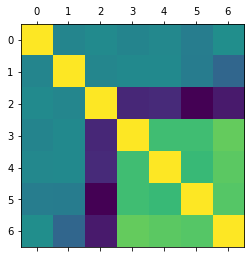

In [50]:

plt.matshow(df.corr())
plt.show()
#The data has -ve correlation

In [51]:
#Q2) Apply the multiple linear regression and generate the regression model. 
#    Find out its parameter and check whether the estimated parameters are correct or not
print(df.columns)
df.columns = ["X1", "X2", "X3", "X4", "X5", "X6", "Y"]
df


Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [52]:
x = df.drop("Y", axis=1)
y = ["Y"]

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=0)

ValueError: ignored

In [16]:
#Q3) For the attached data set, check whether multi collinearity exists in your data set or not
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [54]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
x_var = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]

In [55]:
vif_data = pd.DataFrame()
vif_data["feature"] = x_var.columns
vif_data["VIF"] = [variance_inflation_factor(x_var.values, i) for i in range(len(x_var.columns))]

In [56]:
vif_data
#

,feature,VIF
0,X1,4.253389e+07
1,X2,3.471392e+00
2,X3,4.261358e+00
3,X4,4.748152e+00
4,X5,6.178301e+06
5,X6,4.198817e+07


In [57]:
# Q4) Apply the principal component companies on the data set and find out the 
#appropriate number of dimensions.

#scaling the data before applying PCA
from sklearn.preprocessing import StandardScaler
parameters = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
x = df.loc[:, parameters].values
y = df.loc[:, ['Y']].values
x = StandardScaler().fit_transform(x)



In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principal = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principal, columns=["PC 1","PC 2"])
principalDF


,PC 1,PC 2
0,-2.135051,-0.676826
1,-1.753059,0.175568
2,-1.362278,-0.850140
3,-1.368509,-0.662615
4,-1.151214,1.480461
...,...,...
409,3.967160,0.659799
410,-1.765708,1.755511
411,-1.347530,-0.442634
412,-0.752471,1.074902


In [58]:
finalDF = pd.concat([principalDF, df[["Y"]]], axis = 1)

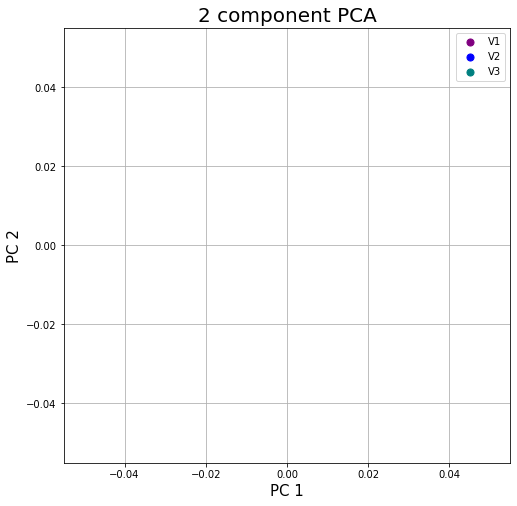

In [62]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PC 1", fontsize = 15)
ax.set_ylabel("PC 2", fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['V1', 'V2', 'V3'] 
colors = ["purple", "blue", "teal"]
for Y, color in zip(targets,colors):
    indicesToKeep = finalDF['Y'] == Y
    ax.scatter(finalDF.loc[indicesToKeep, 'PC 1'], 
               finalDF.loc[indicesToKeep, 'PC 2'], c = color, s = 50)

ax.legend(targets)
ax.grid()

